In [83]:
from proto import *
from scipy.signal import butter,lfilter,hamming
import numpy as np

In [8]:
example = np.load('example.npz')['example'].item()

In [124]:
coeff = 0.97
preemph = lfilter([1, -coeff], 1, signal)
print np.count_nonzero(preemph - example['preemph'])

0


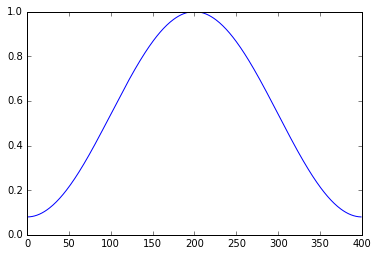

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
hamming_window = hamming(preemph.shape[1], sym=False)
plt.plot(hamming_window)

In [165]:
windowed = example['preemph'] * hamming_window
print np.allclose(windowed, example['windowed'])

True


In [95]:
from scipy import fftpack

In [213]:
NFFT = 512
spec = np.absolute(fftpack.fft(example['windowed'], NFFT))
spec = np.square(spec)
print np.allclose(spec, example['spec'])

True


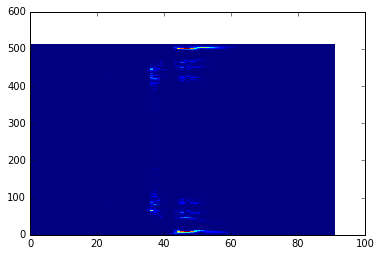

In [208]:
plt.pcolormesh(example['spec'].T)

In [209]:
print example['spec']
print 'vs'
print spec

[[  7.56143209e-01   1.53787705e+02   1.79479691e+02 ...,   1.57766643e+02
    1.79479691e+02   1.53787705e+02]
 [  9.57263405e-01   1.08175131e+02   1.75376470e+02 ...,   1.99246963e+02
    1.75376470e+02   1.08175131e+02]
 [  1.86645429e+02   1.15753092e+02   8.87993538e+01 ...,   1.16787789e+02
    8.87993538e+01   1.15753092e+02]
 ..., 
 [  1.89215902e+02   9.96254485e+02   5.04970955e+02 ...,   1.39739622e+00
    5.04970955e+02   9.96254485e+02]
 [  3.05933713e-01   1.40315380e+03   4.91697509e+03 ...,   4.70058420e+03
    4.91697509e+03   1.40315380e+03]
 [  1.58235759e+02   2.58800006e+02   9.52721806e+01 ...,   1.06766963e+03
    9.52721806e+01   2.58800006e+02]]
vs
[[  7.56143209e-01   8.15722489e+01   7.22154565e+01 ...,   3.33901278e+00
    5.94886690e+02   3.93272701e+01]
 [  9.57263405e-01   4.28763802e+01   6.52987505e+01 ...,   3.08310191e+02
    4.85517001e+02   1.77800069e+03]
 [  1.86645429e+02   7.40578953e+01   4.16951962e+01 ...,   2.36110379e+01
    2.49477021e+01